<a href="https://colab.research.google.com/github/ariondmk/Arion-Damanik/blob/main/TUGAS%2011%20(82%20PERSEN)%20ARION%20DAMANIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [70]:
ls

 3scene/
 gambar.jpg
 model_scene/
'Salinan dari Copy of Untitled0 (1).ipynb'
'Salinan dari Copy of Untitled0.ipynb'
'Salinan dari Salinan dari Copy of Untitled0 (1).ipynb'
'Salinan dari Salinan dari Copy of Untitled0.ipynb'
'Salinan dari Salinan dari scenes_nn_4 layers.ipynb'
'Salinan dari Untitled0 (1).ipynb'
'Salinan dari Untitled0.ipynb'
 Untitled0.ipynb


In [71]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [72]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [73]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  #preprocessing
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [74]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [75]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [76]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [77]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(146, 128, 128, 3)


In [78]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1440100   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [79]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [80]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 4s 256ms/step - loss: 2.2367 - accuracy: 0.2146 - val_loss: 1.6211 - val_accuracy: 0.1781
Epoch 2/25
14/14 [==============================] - 3s 245ms/step - loss: 1.5935 - accuracy: 0.2329 - val_loss: 1.5731 - val_accuracy: 0.1849
Epoch 3/25
14/14 [==============================] - 3s 247ms/step - loss: 1.5231 - accuracy: 0.3881 - val_loss: 1.4653 - val_accuracy: 0.3904
Epoch 4/25
14/14 [==============================] - 3s 249ms/step - loss: 1.3562 - accuracy: 0.4680 - val_loss: 1.3161 - val_accuracy: 0.5068
Epoch 5/25
14/14 [==============================] - 3s 247ms/step - loss: 1.1564 - accuracy: 0.5936 - val_loss: 1.2284 - val_accuracy: 0.4726
Epoch 6/25
14/14 [==============================] - 3s 248ms/step - loss: 1.0180 - accuracy: 0.6187 - val_loss: 1.0449 - val_accuracy: 0.6164
Epoch 7/25
14/14 [==============================] - 3s 247ms/step - loss: 0.8676 - accuracy: 0.6712 - val_loss: 0.9777 - val_accuracy: 0.6164
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


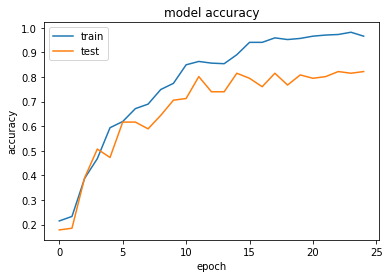

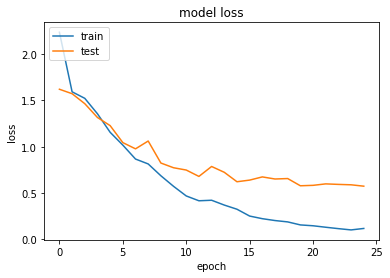

In [81]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [82]:
# evaluate the network
print("[INFO] evaluating network...") 
predictions = model1.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.79      0.90      0.84        30
      GMB_02       0.87      0.74      0.80        27
      GMB_03       0.81      0.85      0.83        26
      GMB_04       0.85      0.79      0.81        28
      GMB_05       0.81      0.83      0.82        35

    accuracy                           0.82       146
   macro avg       0.83      0.82      0.82       146
weighted avg       0.82      0.82      0.82       146



In [83]:
model1.save('model_scene')

INFO:tensorflow:Assets written to: model_scene/assets


In [84]:
import cv2
import matplotlib.pyplot as plt
image1='gambar.jpg'

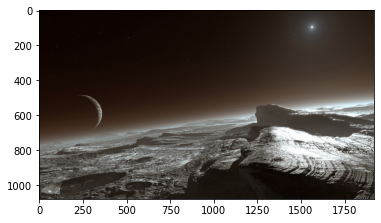

In [85]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [86]:
image_testing = Image.open('gambar.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [87]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [88]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.00280656 0.08622611 0.02947151 0.05364432 0.82785153]]
['GMB_05']
